# Neural Networks From Scratch

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pathlib import Path

save_dir = Path("data/mnist_784/")
download_dataset = False
if download_dataset:
    x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
    x = (x/255).astype('float32')
    y = to_categorical(y)

    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

    x_train.to_parquet(save_dir / "x_train.parquet")
    x_val.to_parquet(save_dir / "x_val.parquet")
    np.save(save_dir / "y_train.npy", y_train)
    np.save(save_dir / "y_val.npy", y_val)
else:
    x_train= pd.read_parquet(save_dir / "x_train.parquet")
    x_val = pd.read_parquet(save_dir / "x_val.parquet")
    y_train = np.load(save_dir / "y_train.npy")
    y_val = np.load(save_dir / "y_val.npy")

In [2]:
print("X:" , x_train.shape)
print("Y:", y_train.shape)

X: (59500, 784)
Y: (59500, 10)


### Results

In [6]:
from neural_network import DeepNeuralNetwork
dnn = DeepNeuralNetwork(sizes=[784, 100, 10], activation=None, batch_norm=False)
dnn.train(x_train, y_train, x_val, y_val)

Epoch: 0, Time Spent: 0.02s, Accuracy: 3.78%
Epoch: 1, Time Spent: 0.41s, Accuracy: 87.06%
Epoch: 2, Time Spent: 0.79s, Accuracy: 89.65%
Epoch: 3, Time Spent: 1.17s, Accuracy: 90.26%
Epoch: 4, Time Spent: 1.53s, Accuracy: 90.90%
Epoch: 5, Time Spent: 1.90s, Accuracy: 91.30%
Epoch: 6, Time Spent: 2.29s, Accuracy: 91.44%
Epoch: 7, Time Spent: 2.69s, Accuracy: 91.49%
Epoch: 8, Time Spent: 3.06s, Accuracy: 91.30%
Epoch: 9, Time Spent: 3.44s, Accuracy: 91.27%
Epoch: 10, Time Spent: 3.81s, Accuracy: 91.05%


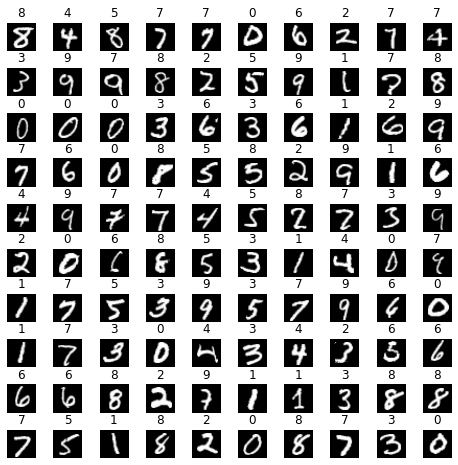

In [7]:
dnn.requires_grad = False
# plot the MNIST images in a grid, with the prediction for each image as the caption
fig, ax = plt.subplots(10, 10, figsize=(8, 8))
# add some space between the images
fig.subplots_adjust(hspace=0.6, wspace=0.5)
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(x_val.iloc[i*10+j].to_numpy().reshape(28, 28), cmap='gray')
        ax[i, j].set_title(np.argmax(dnn.forward_pass(x_val.iloc[i*10+j])), fontsize=12)
        ax[i, j].axis('off')